# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

## Some helper methods to get information of all recordings
Uncomment and run to see output

In [6]:
# rMeta = loader.getAllRecordingMeta() # All the meta files
# print(rMeta[0])

In [7]:
loader.locationToRecordingIds

{4: [0, 1, 2, 3, 4, 5, 6],
 1: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 2: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 3: [30, 31, 32]}

In [8]:
# loader.getRecordingIdsOfALocation(1)

# Recording Specific methods

In [9]:
recordingData = loader.getRecordingData('18') # loads the recording with id 18

In [10]:
# recordingData.tracksMetaDf.head()
# recordingData.tracksDf.tail()

In [11]:
# recordingData.getPedIds() # All the pedestrian Ids in the recording

In [12]:

# pedFrames = loader.extractPedFrames(recordingData.tracksMetaDf, recordingData.tracksDf)
# pedFrames.tail()

In [13]:
# crossingIds = recordingData.getCrossingPedIds()
# recordingData.getCrossingPedIds() # only the ids who crosses the road.

In [14]:
# crossingDf = recordingData.getCrossingDf()
# crossingDf.head()

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data**
```
loc2data = loader.getLocationData(2)
crossingDf = loc2data.getCrossingDf()
```

In [15]:
loc2data = loader.getLocationData(2)

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
clipping trajectories for scene # 40: 100%|██████████| 25/25 [00:02<00:00, 11.81it/s]


In [16]:
loc2data.summary()

{'#original frameRate': 25.0,
 '#crossing trajectories': 173,
 '#scene trajectories': 199,
 'scene#10': 75,
 'scene#11': 0,
 'scene#20': 22,
 'scene#21': 5,
 'scene#22': 7,
 'scene#30': 62,
 'scene#31': 4,
 'scene#40': 24}

In [17]:
# loc2data.getUniqueCrossingIds()

In [18]:
crossingDf = loc2data.getCrossingDf() # get all crossing data

In [19]:
# crossingDf.head()
# crossingDf.tail()

In [20]:
# crossingDf[crossingDf['uniqueTrackId'] == 18001]

In [21]:
# loc2data.getSceneConfig() # scene configuration 

# Scene data
This class holds the data of a scene. The purpose of this class is to crop trajectories to the scene area and transfrom them to scene coordinate system.

In [22]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

**Extracting ccene data from location data**

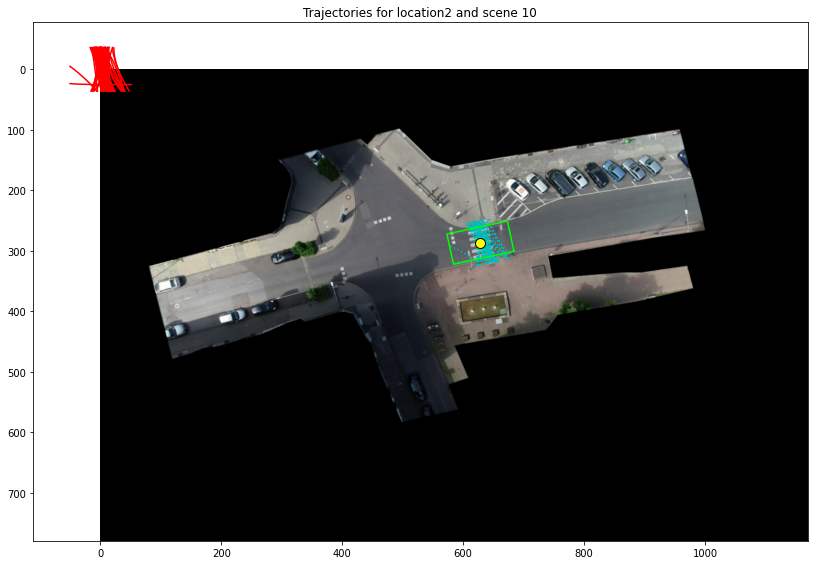

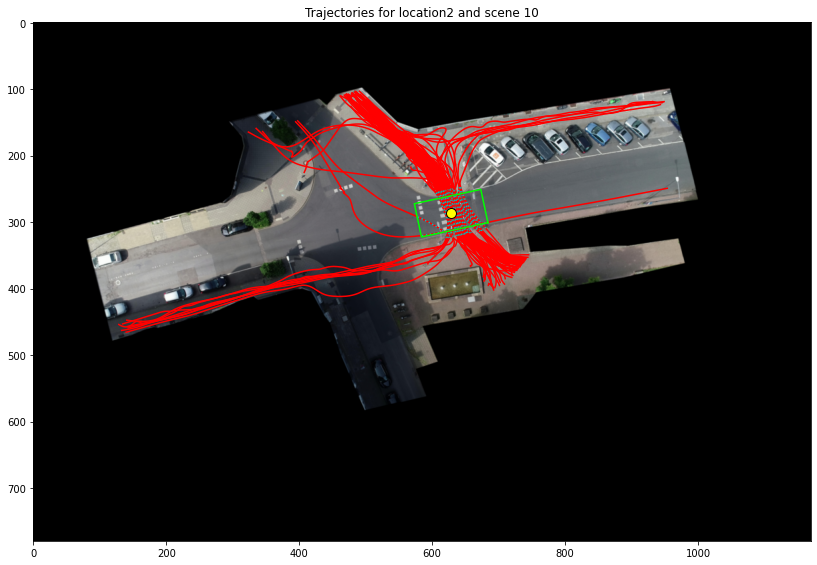

In [23]:
SceneData = loc2data.getSceneData(10, 10, 5, refresh=False)
visualizer.showLocationSceneData(SceneData, onlyClipped=True, showLocal=True)
visualizer.showLocationSceneData(SceneData)

In [26]:
scene11Data = loc2data.getSceneData(11, 10, 6, refresh=False)
print(scene11Data.clippedPedSize())
# visualizer.showLocationSceneData(scene11Data)

0


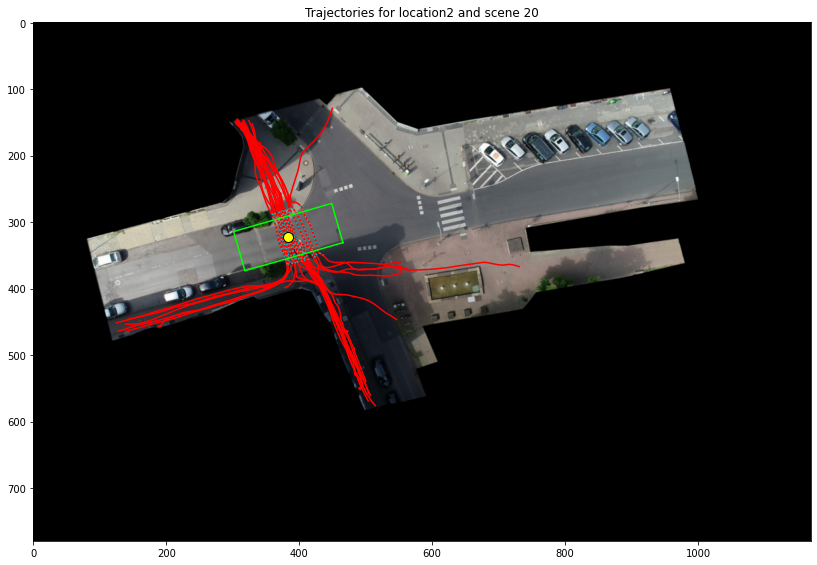

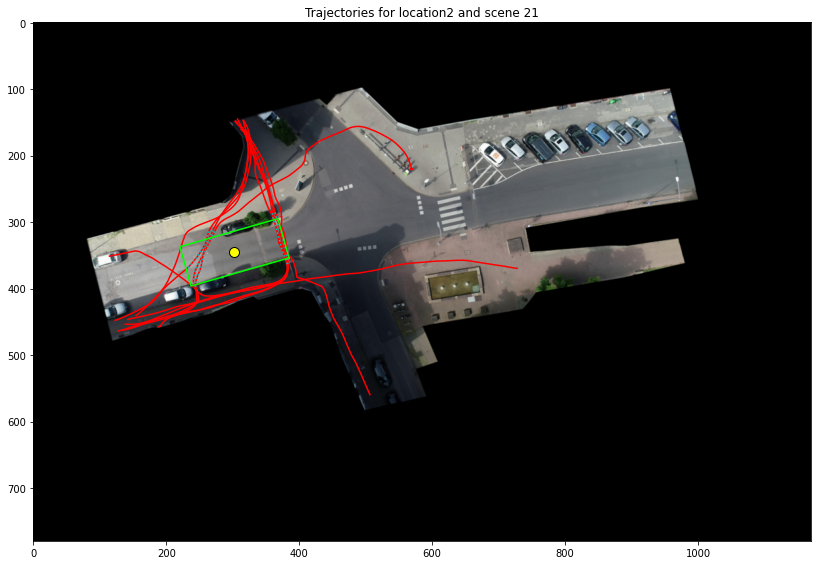

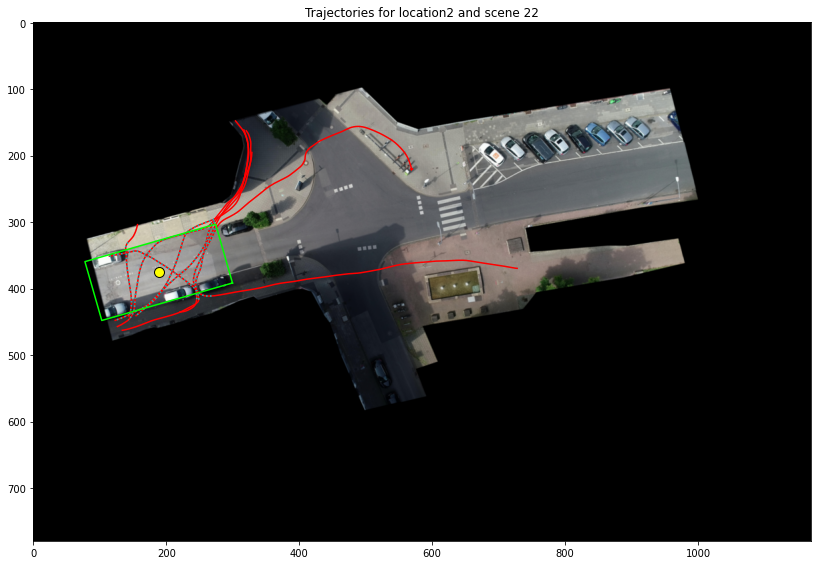

In [27]:
scene20Data = loc2data.getSceneData(20, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene20Data)

scene21Data = loc2data.getSceneData(21, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene21Data, onlyClipped=False)

scene22Data = loc2data.getSceneData(22, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene22Data)

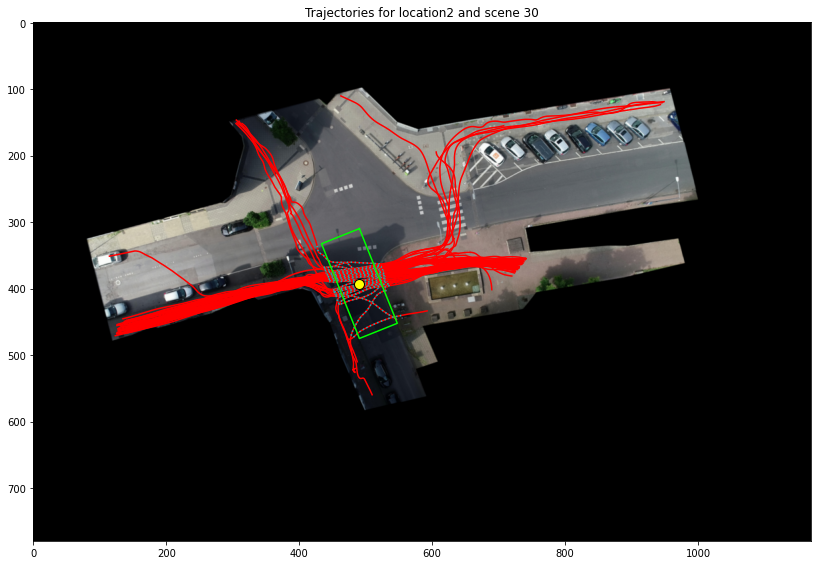

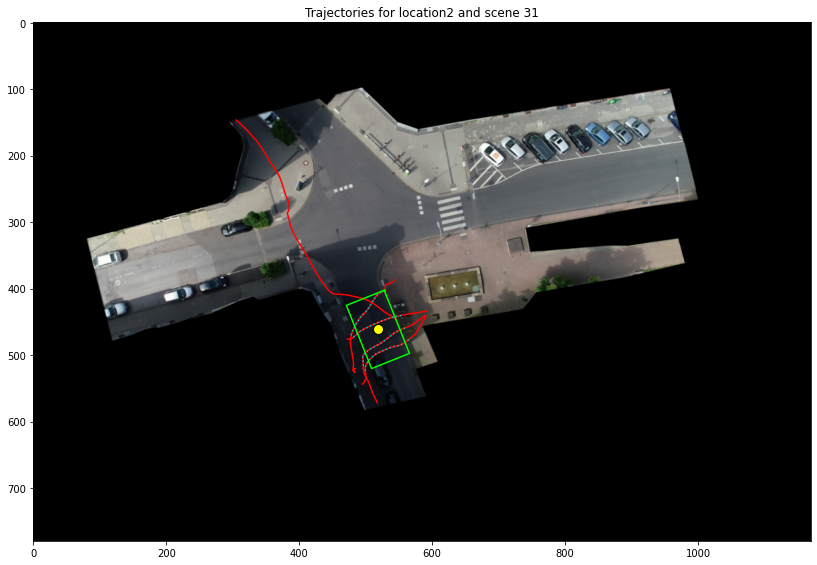

In [28]:
scene30Data = loc2data.getSceneData(30, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene30Data)

scene31Data = loc2data.getSceneData(31, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene31Data)

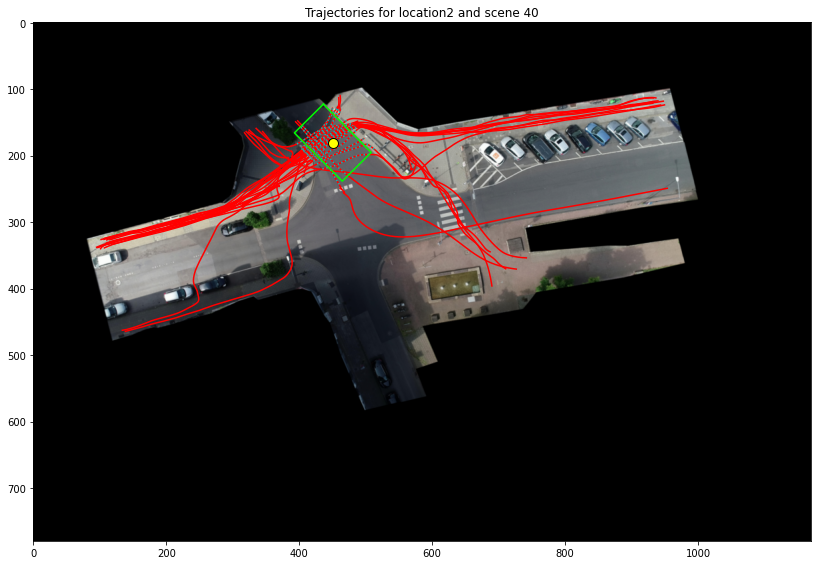

In [29]:
scene40Data = loc2data.getSceneData(40, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene40Data)

# Converting trajectories to scene coordinate system

In [30]:
sceneDf = scene22Data.getClippedPedDfs()
sceneDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,sceneX,sceneY
0,18,1,211,211,26.60301,-28.98654,225.26829,0.0,0.0,-0.86347,-1.13728,-0.06830,0.10518,18001,22,9.985276,5.171479
1,18,1,212,212,26.56985,-29.03385,224.93987,0.0,0.0,-0.86519,-1.13267,-0.08221,0.13033,18001,22,9.940360,5.135142
2,18,1,213,213,26.53628,-29.08057,224.59823,0.0,0.0,-0.86791,-1.12644,-0.09675,0.15492,18001,22,9.895212,5.099485
3,18,1,214,214,26.50233,-29.12662,224.24346,0.0,0.0,-0.87156,-1.11879,-0.11160,0.17853,18001,22,9.849884,5.064577
4,18,1,215,215,26.46800,-29.17184,223.87570,0.0,0.0,-0.87604,-1.10995,-0.12654,0.20087,18001,22,9.804420,5.030571


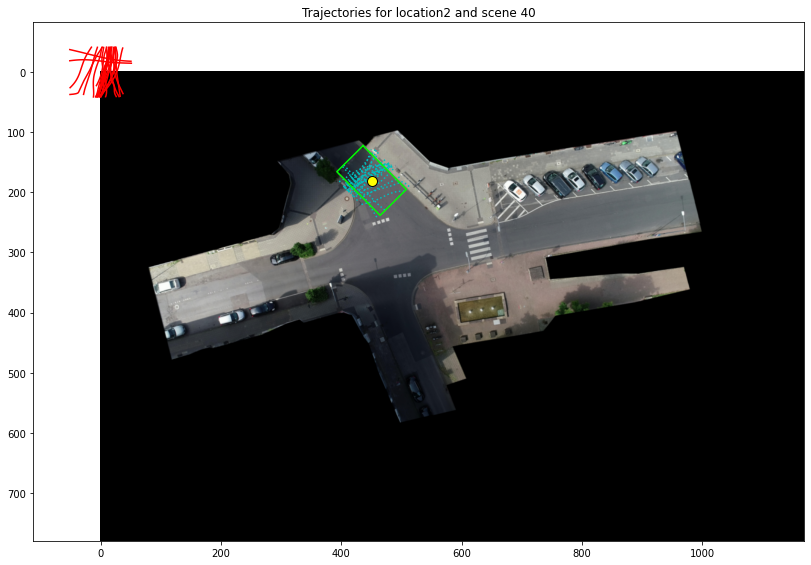

In [32]:
scene40Data = loc2data.getSceneData(40, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene40Data, onlyClipped=True, showLocal=True)

In [35]:
sceneLocalDf = scene40Data.getClippedPedDfs()
sceneLocalDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,sceneX,sceneY
0,18,61,3194,460,41.08947,-20.32988,33.80087,0.0,0.0,1.52007,1.13821,0.36942,0.04107,18061,40,0.166207,3.989167
1,18,61,3195,461,41.14921,-20.28428,33.72752,0.0,0.0,1.53807,1.14156,0.36927,0.01843,18061,40,0.156547,3.914636
2,18,61,3196,462,41.21010,-20.23842,33.65256,0.0,0.0,1.55644,1.14394,0.36639,-0.00554,18061,40,0.146261,3.839105
3,18,61,3197,463,41.27185,-20.19234,33.57628,0.0,0.0,1.57501,1.14522,0.36050,-0.03078,18061,40,0.135527,3.762808
4,18,61,3198,464,41.33490,-20.14589,33.49898,0.0,0.0,1.59344,1.14523,0.35145,-0.05712,18061,40,0.124141,3.685328


In [37]:
transformerData = loc2data.getCrossingDataForTransformer()

In [39]:
transformerData.tail()

,frame,uniqueTrackId,sceneX,sceneY,sceneId
31353,20966,19288,-1.699777,3.730898,40
31354,20967,19288,-1.651954,3.805468,40
31355,20968,19288,-1.603145,3.881060,40
31356,20969,19288,-1.553514,3.957569,40
31357,20970,19288,-1.503727,4.034234,40
